# Working with Terms and Documents

This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [2]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2022-02-09 02:09:04--  https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz [following]
--2022-02-09 02:09:04--  https://github.com/dasmiq/cs6200-hw1/raw/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz [following]
--2022-02-09 02:09:04--  https://raw.githubusercontent.com/dasmiq/cs6200-hw1/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

We convert this file with one JSON record on each line to a list of dictionaries.

In [67]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

import pandas as pd

dataFrame = pd.DataFrame(terms)

import copy
cpy_list = []
for li in terms:
    d2 = copy.deepcopy(li)
    cpy_list.append(d2)

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [68]:
terms[1:10]

[{'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'about'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'abuse'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy'},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'actress'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'ad'},
 {'count': 1, 'field': 'body', 'id': 'APW_ENG_20100101.0001', 'term': 'after'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agenda'},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'agreed'}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [5]:
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.

type(terms)
import operator
cpy_list.sort(key=operator.itemgetter('count'), reverse=True)
count = 0

for i in range(len(cpy_list)):
  if cpy_list[i]['id'] == 'APW_ENG_20100101.0001' and count<6:
      print('Term:' , cpy_list[i]['term'], ' Count:' , cpy_list[i]['count'])
      count = count+1

Term: a  Count: 16
Term: the  Count: 11
Term: and  Count: 10
Term: brooks  Count: 10
Term: of  Count: 10
Term: to  Count: 10


In [63]:
# TODO: Print the 10 terms from all fields of document APW_ENG_20100102.0077 with the highest count.

res = set(sub['field'] for sub in terms)  
import operator
cpy_list.sort(key=operator.itemgetter('count'), reverse=True)
count = 0

for i in range(len(cpy_list)):
  if cpy_list[i]['id'] == 'APW_ENG_20100102.0077' and count<10:
      print('Field:' , cpy_list[i]['field'],'Term:' + cpy_list[i]['term'], ' Count:' , cpy_list[i]['count'])
      count = count+1

Field: body Term:the  Count: 50
Field: body Term:in  Count: 21
Field: body Term:to  Count: 21
Field: body Term:and  Count: 19
Field: body Term:of  Count: 14
Field: body Term:a  Count: 13
Field: body Term:militants  Count: 8
Field: body Term:on  Count: 8
Field: body Term:said  Count: 8
Field: body Term:was  Count: 8


In [8]:
df1 = dataFrame.groupby(['term', 'count']).count().reset_index()
df4 = df1['count'].groupby(df1['term']).sum()
print(type(df4))
df4 = pd.Series(df4)
df4 = df4.to_frame()
df4 = df4.reset_index()
df4.sort_values(by =['count'], ascending = False)
print(df4)

<class 'pandas.core.series.Series'>
            term  count
0              a   1161
1          aaaar      1
2         aafter      1
3          aamir      2
4      aardvarks      1
...          ...    ...
27551     zurich      1
27552   zuzulova      1
27553     zverev      1
27554    zvornik      1
27555     zwolle      2

[27556 rows x 2 columns]


In [11]:
# TODO: Print the 10 terms with the highest total count in the corpus.

df1 = dataFrame.groupby(['term', 'id']).sum().reset_index()
df4 = df1['count'].groupby(df1['term']).sum()

df4 = pd.Series(df4)
df4 = df4.to_frame()
df4 = df4.reset_index()
dic1 = dict(zip(df4['term'],df4['count']))

dict1_sorted= sorted(dic1.items(), key=lambda item: item[1], reverse = True)
print(list(dict1_sorted)[:10])


[('the', 62216), ('to', 26931), ('in', 25659), ('a', 23383), ('of', 22326), ('and', 22125), ('said', 10888), ('for', 9716), ('on', 9382), ('that', 8942)]


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [64]:
# TODO: Compute the number of distinct documents in the collection.
N = 0

setID = list(set(sub['id'] for sub in terms))
N = len(setID)
print('Number of disctinct documents')
print(N)

setTerms = list(set(sub['term'] for sub in terms))
NT = len(setTerms)
print('Number of disctinct words')
print(NT)

# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.

df = dict()
df1 = dataFrame.groupby(['term', 'id']).count().reset_index()
print(df1.term.value_counts())

#Dictionary of Frequency of the terms

df3 = df1['count'].groupby(df1['term']).count()
df3 = pd.Series(df3)
df3 = df3.to_frame()
df3 = df3.reset_index()
dic = dict(zip(df3['term'],df3['count']))

print("Dictionary of the number of distinct documents each term appears in")
print(dic)




Number of disctinct documents
2778
Number of disctinct words
27556
the          2696
in           2589
a            2571
of           2527
and          2521
             ... 
forfar          1
sheriffs        1
mazur           1
popescu's       1
dizziness       1
Name: term, Length: 27556, dtype: int64
Dictionary of the number of distinct documents each term appears in
{'a': 2571, 'aaaar': 1, 'aafter': 1, 'aamir': 2, 'aardvarks': 1, 'aare': 1, 'aarhus': 18, 'aaron': 15, 'ab': 12, 'ababa': 6, 'abalone': 1, 'abandon': 18, 'abandoned': 11, 'abandoning': 11, 'abb': 6, 'abbas': 32, 'abbleby': 1, 'abbot': 2, 'abbott': 4, 'abc': 10, "abc's": 6, 'abdel': 17, 'abdellah': 1, 'abdi': 2, 'abdirahman': 1, 'abdolhossein': 1, 'abdomen': 2, 'abdominal': 2, 'abdou': 1, 'abdoulay': 1, 'abdoulaye': 2, 'abducted': 3, 'abducting': 1, 'abductions': 4, 'abdul': 18, 'abdulahi': 2, 'abdulatif': 2, 'abdulla': 6, 'abdullah': 70, 'abdullahi': 2, 'abdulle': 1, 'abdulmutallab': 124, "abdulmutallab's": 51, 'abdulmu

In [65]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.

countThe = 0
setID = list(set(sub['id'] for sub in terms))

N = len(setID)
for i in range (N):
  for j in range (len(cpy_list)):
    if cpy_list[j]['term'].lower() == 'the' and cpy_list[j]['id'] == setID[i] :
      countThe = countThe+1
      break

print(countThe)
print("The relative document frequency of 'the': ")
print(countThe/N)


2696
The relative document frequency of 'the': 
0.9704823614110871


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [69]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
import math

tfidf_terms = None
setID = list(set(sub['id'] for sub in terms))
N = len(setID)
df3.to_dict('list')
print(type(df3))

for j in range (len(cpy_list)):
  
  #print(cpy_list[j]['term'])
  freq = dic.get(cpy_list[j]['term'])
  #Compute the tf_idf
  tfidf_terms = math.log2(cpy_list[j]['count'] + 1) * math.log2(N/freq)
  #Add to the Terms
  terms[j]['tf_idf'] = tfidf_terms 

terms[1:5]  

<class 'pandas.core.frame.DataFrame'>


[{'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'about',
  'tf_idf': 1.367028349437185},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'abuse',
  'tf_idf': 6.7393911658403},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'academy',
  'tf_idf': 7.11790278909403},
 {'count': 2,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'accused',
  'tf_idf': 6.005072944104477}]

In [ ]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values.

terms.sort(key=operator.itemgetter('tf_idf'), reverse=True)
terms[1:20]

[{'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100102.0014',
  'term': 'under',
  'tf_idf': 46.87112294996272},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100102.0066',
  'term': 'condemned',
  'tf_idf': 45.75932353592557},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100102.0379',
  'term': 'newspaper',
  'tf_idf': 44.694167695978784},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100102.0088',
  'term': 'comes',
  'tf_idf': 44.694167695978784},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100102.0005',
  'term': 'nearly',
  'tf_idf': 44.347644847762616},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100101.0001',
  'term': 'deal',
  'tf_idf': 43.016782320234235},
 {'count': 4,
  'field': 'body',
  'id': 'APW_ENG_20100102.0237',
  'term': 'government',
  'tf_idf': 42.672420807211616},
 {'count': 1,
  'field': 'body',
  'id': 'APW_ENG_20100102.0019',
  'term': 'largest',
  'tf_idf': 42.33240457190186},
 {'count': 4,
  'field': 'body',
  'id': 'AP

## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [70]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.
frequency = []

setTerms = list(set(sub['term'] for sub in terms))
NT = len(setTerms)
print('List of disctinct words')
print(setTerms)

df1 = dataFrame.groupby(['term', 'id']).sum().reset_index()
df4 = df1['count'].groupby(df1['term']).sum()

df4 = pd.Series(df4)
df4 = df4.to_frame()
df4 = df4.reset_index()
dic1 = dict(zip(df4['term'],df4['count']))

dict1_sorted= sorted(dic1.items(), key=lambda item: item[1], reverse = True)
print('Sorted List of Distinct words in order of frequency: ')
print(dict1_sorted)

List of disctinct words
['appreciating', 'chrysler', 'indebtedness', 'lipow', "tug's", 'cardholders', 'pro', 'idaho', 'kerviel', 'valuation', 'shinya', "vatican's", 'brew', 'pressure', 'buddy', 'russ', 'unhelpful', 'hursts', 'remote', 'briton', 'mousavi', 'amendments', 'trudeau', 'uconn', 'capitals', 'necessity', 'monteagudo', 'leasing', 'stints', 'corroborate', 'deported', 'apertura', 'hospital', 'bedrooms', 'blunder', 'impurities', 'harasses', 'motions', 'purchaser', 'hobbies', 'bellucci', 'espinoza', 'whilst', 'arantxa', 'product', "universal's", 'abdulle', 'scuffing', 'help', 'pregnancy', 'tuneup', 'eads', 'prevented', 'terse', 'gillette', 'harrington', "minister's", 'harman', 'anabel', 'frequencies', 'polynesia', 'ichakayev', 'court', 'associations', 'spaghetti', 'revealed', 'mitterrand', 'lowden', 'forwarded', 'weiping', 'hair', 'vacancy', 'decreed', 'destitute', 'informant', "teva's", 'sherpao', 'unsustainable', 'essential', 'thing', 'blacked', 'inverse', 'gathering', 'gartner',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


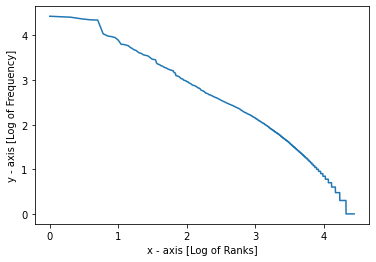

In [61]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.

import matplotlib.pyplot as plt
import numpy as np
 
values = list(dic1.values())
values.sort(reverse=True)
num = len(values)
# x axis values
x = list(range(num))
# corresponding y axis values

y = (values)
# plotting the points
plt.plot(np.log10(x), np.log10(y))

 
# naming the x axis
plt.xlabel('x - axis [Log of Ranks]')
# naming the y axis
plt.ylabel('y - axis [Log of Frequency]')
 
# function to show the plot
plt.show()

In [24]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.

ntokens = 0
values = dic1.values()
values_list = list(values)

for i in range(len(values_list)):
  ntokens = ntokens + values_list[i]

print(ntokens)



1000000


In [30]:

# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.


topF = 0
for j in range (0,20):
   topF = topF + values_list[j]

# Calculating Proportion 
proportion = (topF / ntokens)
print(proportion)


0.023641


In [35]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.

freq = 0
for j in range (len(values_list)):
  if values_list[j] == 1:
    freq = freq + 1

# Calculating Proportion 
proportion = (freq / ntokens)
print(proportion)    


0.006641


## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll briefly explore acquiring new data.

Find a collection of documents that you're interested in. For the statistics to be meaningful, this collection should have at least 1,000 words.

The format could be anything you can extract text from: HTML, PDF, MS PowerPoint, chat logs, etc.

The collection should be in a natural language, not mostly code or numerical data. It could be in English or in any other language.

The final project for this course will involve designing an information retrieval task on some dataset. You could use this exercise to think about what kind of data you might be interested in, although that is not required.

**TODO**: Write code to download and extract the text from the collection. Describe choices you make about what contents to keep.

In [72]:
# TODO: Data acquisition code here.
url ='https://raw.githubusercontent.com/Living-with-machines/PressPicker_public/master/datasets/title_list_with_corrected_counties.csv'
msg_df = pd.read_csv(url,index_col=1, encoding= 'unicode_escape')
msg_df.head(3)

,title_id,nlp,publication_title,edition,preceding_titles,succeeding_titles,place_of_publication,country_of_publication,general_area_of_coverage,coverage_city,first_geographical_subject_heading,subsequent_geographical_subject_headings,first_date_held,last_date_held,publication_date_one,publication_date_two,current_publication_frequency,publisher,holdings_more_information,free_text_information_about_dates_of_publication,online_status,link_to_british_newspaper_archive,explore_link,wikititle,geometry,G_NAME
nid,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,2841953,NaN,"Corante, or, Newes from Italy, Germany, Hungar...",NaN,NaN,NaN,London,England,NaN,London,NaN,NaN,1621.0,1621,1621.0,1621.0,NaN,N. B|Nathaniel Butter,NaN,NaN,NaN,NaN,http://primocat.bl.uk/F?func=direct&local_base...,London,"c(-0.1275, 51.5072)",LONDON
NaN,2852602,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,London,NaN,NaN,1622.0,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...,London,"c(-0.1275, 51.5072)",LONDON
NaN,2852624,NaN,A Relation of the late Occurrents which haue h...,NaN,NaN,NaN,London,England,London,London,NaN,NaN,1622.0,1622,NaN,NaN,NaN,NaN,NaN,NaN,BURNEY,NaN,http://primocat.bl.uk/F?func=direct&local_base...,London,"c(-0.1275, 51.5072)",LONDON


In [73]:
msg_df.drop(['nlp','edition','preceding_titles','succeeding_titles','place_of_publication','country_of_publication','publisher','holdings_more_information','free_text_information_about_dates_of_publication','online_status','link_to_british_newspaper_archive'],axis=1, inplace = True)
msg_df.drop(['general_area_of_coverage','coverage_city','first_geographical_subject_heading','subsequent_geographical_subject_headings','first_date_held','last_date_held','publication_date_one','publication_date_two','current_publication_frequency'],axis=1,inplace = True)
msg_df.drop(['wikititle','geometry','G_NAME'],axis=1, inplace = True)
msg_df.head(5)

,title_id,publication_title,explore_link
nid,,,
NaN,2841953,"Corante, or, Newes from Italy, Germany, Hungar...",http://primocat.bl.uk/F?func=direct&local_base...
NaN,2852602,A Relation of the late Occurrents which haue h...,http://primocat.bl.uk/F?func=direct&local_base...
NaN,2852624,A Relation of the late Occurrents which haue h...,http://primocat.bl.uk/F?func=direct&local_base...
NaN,2852630,A Relation of the late Occurrents which haue h...,http://primocat.bl.uk/F?func=direct&local_base...
NaN,2852631,A Relation of the late Occurrents which haue h...,http://primocat.bl.uk/F?func=direct&local_base...


In [74]:
#msg_df.set_index('title_id', inplace=True)
msg_df.columns

Index(['title_id', 'publication_title', 'explore_link'], dtype='object')

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Describe your tokenization approach here.

Each term may also be associated with a field, such as `body` and `title` in the newswire collection above. Describe the different fields in your data.

In [79]:
# TODO: Tokenization code here.

#Remove Punctuation
import string
string.punctuation

def remove_punct(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

msg_df['publication_title'] = msg_df['publication_title'].apply(lambda x: remove_punct(x))
msg_df.head()    

tokens_list = list()

#Tokenize
import re

def tokens(txt):
    tokens = re.split('\W+', txt)
    tokens_list.append(tokens)
    return tokens


msg_df['publication_title'] = msg_df['publication_title'].apply(lambda x: tokens(x.lower()))

msg_df.head()

,title_id,publication_title,explore_link
nid,,,
NaN,2841953,[coranteornewesfromitalygermanyhungariespainea...,http://primocat.bl.uk/F?func=direct&local_base...
NaN,2852602,[arelationofthelateoccurrentswhichhauehappened...,http://primocat.bl.uk/F?func=direct&local_base...
NaN,2852624,[arelationofthelateoccurrentswhichhauehappened...,http://primocat.bl.uk/F?func=direct&local_base...
NaN,2852630,[arelationofthelateoccurrentswhichhauehappened...,http://primocat.bl.uk/F?func=direct&local_base...
NaN,2852631,[arelationofthelateoccurrentswhichhauehappened...,http://primocat.bl.uk/F?func=direct&local_base...


In [83]:
print(msg_df['publication_title'])

nid
NaN        [coranteornewesfromitalygermanyhungariespainea...
NaN        [arelationofthelateoccurrentswhichhauehappened...
NaN        [arelationofthelateoccurrentswhichhauehappened...
NaN        [arelationofthelateoccurrentswhichhauehappened...
NaN        [arelationofthelateoccurrentswhichhauehappened...
                                 ...                        
NaN        [voiceofbahrainawtalbaraynawtalbaraynvoiceofba...
33834.0                  [weekendheraldweekendheraldcrawley]
33865.0    [weeklygazetteweeklygazettedoretotleyecclesall...
NaN                                           [workersdaily]
NaN        [writtenpostscriptsinmstoanumberoftheissuesoft...
Name: publication_title, Length: 22486, dtype: object


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
cv = CountVectorizer()

from collections import Counter

df = pd.DataFrame(columns = ['title_ID','word','count','link'])

for i in range(len(msg_df)):
  for token in tokens_list:
    word_count = token.count()
    df['word'] = token
    df['link'] = msg_df.iloc[i]['explore_link']
    df['count'] = word_count


df.head(5)

TypeError: ignored

**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections?

In [ ]:
# TODO: Graph code here.

df_plot = df['count'].groupby(df['word']).count()
df_plot = pd.Series(df_plot)
df_plot = df_plot.to_frame()
df_plot = df_plot.reset_index()


values = list(dic1.values())
values.sort(reverse=True)
num = len(values)
# x axis values
x = list(range(num))
# corresponding y axis values

y = (values)
# plotting the points
plt.plot(np.log10(x), np.log10(y))

 
# naming the x axis
plt.xlabel('x - axis [Log of Ranks]')
# naming the y axis
plt.ylabel('y - axis [Log of Frequency]')
 
# function to show the plot
plt.show()
